In [ ]:
#for data processing
import pandas as pd
import numpy as np
import string
import re

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for nlp
from collections import Counter
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#for regression model

from sklearn import svm

from sklearn import metrics

#for evaluation
import scipy

In [ ]:
#load train data
cols = ['id', 'text', 'label', 'intensity']

anger_train = pd.read_csv('/content/drive/MyDrive/iqgateway/train/anger-ratings-0to1.train.txt', header=None, sep='\t', names=cols, index_col=0)
fear_train = pd.read_csv('/content/drive/MyDrive/iqgateway/train/fear-ratings-0to1.train.txt', header=None, sep='\t', names=cols, index_col=0)
sad_train = pd.read_csv('/content/drive/MyDrive/iqgateway/train/sadness-ratings-0to1.train.txt', header=None, sep='\t', names=cols, index_col=0)
joy_train = pd.read_csv('/content/drive/MyDrive/iqgateway/train/joy-ratings-0to1.train.txt', header=None, sep='\t', names=cols, index_col=0)

joy_train.head()

,text,label,intensity
id,,,
30000,Just got back from seeing @GaryDelaney in Burs...,joy,0.980
30001,Oh dear an evening of absolute hilarity I don'...,joy,0.958
30002,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,0.940
30003,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938
30004,I feel so blessed to work with the family that...,joy,0.938


In [ ]:
frames = [anger_train, fear_train, sad_train, joy_train]
data_training = pd.concat(frames)
data_training.reset_index(inplace=True)
data_training.label.value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

In [ ]:
data_training.head()

,id,text,label,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
punc = string.punctuation
data_training['word_count'] = data_training['text'].apply(lambda x:len(x.split()))
data_training['char_count'] = data_training['text'].apply(lambda x:len(x.replace(' ','')))
data_training['punc_count'] = data_training['text'].apply(lambda x:len([a for a in x if a in punc]))
data_training.head()

,id,text,label,intensity,word_count,char_count,punc_count
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938,18,79,12
1,10001,So my Indian Uber driver just called someone t...,anger,0.896,23,97,4
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896,19,90,4
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,24,111,13
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896,24,102,6


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Cleaning text by removing links, numbers, @, stopwords, and transform all to lower case
from nltk.corpus import stopwords

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'[0-9]+'
combined_pat = r'|'.join((pat1, pat2, pat3))
stop_words= set(stopwords.words('english'))

def tweet_cleaner(data_frame):
    print('Cleaning and parsing the tweets.....\n')
    clean_data = []
    for index, row in data_frame.iterrows():
        stripped = re.sub(combined_pat, '', row.text)
        lower_case = stripped.lower()
        words = tok.tokenize(lower_case)
        filtered_words = [w for w in words if not w in stop_words]
        clean_data.append((' '.join(filtered_words)).strip())
        
    print('Done!')
    return clean_data

In [ ]:
clean_data_training_list = tweet_cleaner(data_training)

Cleaning and parsing the tweets.....

Done!


In [ ]:
data_training.text = pd.DataFrame(clean_data_training_list)
data_training.head()

,id,text,label,intensity,word_count,char_count,punc_count
0,10000,fu * k ! heck ! moved fridge !... knock landlo...,anger,0.938,18,79,12
1,10001,indian uber driver called someone n word . ' m...,anger,0.896,23,97,4
2,10002,asked parcel delivered pick store address # fu...,anger,0.896,19,90,4
3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896,24,111,13
4,10004,"' join put phone , talk rude . taking money ac...",anger,0.896,24,102,6


In [ ]:
#making one-hot encoding of label
labels = pd.get_dummies(data_training['label'])

#

vectorizer_tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer_tfidf.fit_transform(data_training.text)
X_tfidf = pd.DataFrame.sparse.from_spmatrix(X_tfidf).join(labels)

In [ ]:
#Training Regression Models

tfidf_svr = svm.SVR().fit(X_tfidf, data_training['intensity'])

In [ ]:
#Load data development to test the models
cols = ['id', 'text', 'label', 'intensity']


anger_dev = pd.read_csv('/content/drive/MyDrive/iqgateway/dev/with/anger-ratings-0to1.dev.gold.txt', header=None, sep='\t', names=cols, index_col=0)
fear_dev = pd.read_csv('/content/drive/MyDrive/iqgateway/dev/with/fear-ratings-0to1.dev.gold.txt', header=None, sep='\t', names=cols, index_col=0)
sad_dev = pd.read_csv('/content/drive/MyDrive/iqgateway/dev/with/sadness-ratings-0to1.dev.gold.txt', header=None, sep='\t', names=cols, index_col=0)
joy_dev = pd.read_csv('/content/drive/MyDrive/iqgateway/dev/with/joy-ratings-0to1.dev.gold.txt', header=None, sep='\t', names=cols, index_col=0)

joy_dev.head()

,text,label,intensity
id,,,
30823,"@theclobra lol I thought maybe, couldn't decid...",joy,0.312
30824,Nawaz Sharif is getting more funnier than @kap...,joy,0.700
30825,Nawaz Sharif is getting more funnier than @kap...,joy,0.580
30826,@tomderivan73 😁...I'll just people watch and e...,joy,0.438
30827,I love my family so much #lucky #grateful #sma...,joy,0.936


In [ ]:
frames = [anger_dev, fear_dev, sad_dev, joy_dev]
data_dev = pd.concat(frames)
data_dev.reset_index(inplace=True)
data_dev.label.value_counts()

fear       110
anger       84
joy         79
sadness     74
Name: label, dtype: int64

In [ ]:
clean_data_dev_list = tweet_cleaner(data_dev)

Cleaning and parsing the tweets.....

Done!


In [ ]:
data_dev.text = pd.DataFrame(clean_data_dev_list)
data_dev.head()

,id,text,label,intensity
0,10857,pls dont insult word ' molna ',anger,0.479
1,10858,would almost took offense actually snapped,anger,0.458
2,10859,rutgers game abomination . affront god man . m...,anger,0.562
3,10860,"' lisa asked started raging , ' call ?' heh",anger,0.500
4,10861,sometimes get mad something minuscule try ruin...,anger,0.708


In [ ]:
labels = pd.get_dummies(data_dev['label'])


X_Dev_tfidf = vectorizer_tfidf.transform(data_dev['text'])
X_Dev_tfidf = pd.DataFrame.sparse.from_spmatrix(X_Dev_tfidf).join(labels)

In [ ]:
#define function to get the scores
def get_score(y_test, y_pred, name):
    print(name + '\n')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('-------------------------------------------------------------------------------')

In [ ]:

get_score(data_dev['intensity'], tfidf_svr.predict(X_Dev_tfidf), "Tfidf-SVR")

Tfidf-SVR

Mean Absolute Error: 0.12560180735819876
Mean Squared Error: 0.02486783290808016
Root Mean Squared Error: 0.15769538011013562
-------------------------------------------------------------------------------


In [ ]:
#SVR model with tf-idf vectorisation produce the smallest error, so it is chosen as the final model
y_actual = data_dev['intensity']
y_predicted = tfidf_svr.predict(X_Dev_tfidf)

pd.DataFrame(data={"Actual Intensity" : data_dev['intensity'], "Predicted Intensity" : tfidf_svr.predict(X_Dev_tfidf)})

,Actual Intensity,Predicted Intensity
0,0.479,0.492791
1,0.458,0.386838
2,0.562,0.492455
3,0.500,0.598758
4,0.708,0.531764
...,...,...
342,0.580,0.499381
343,0.170,0.458617
344,0.396,0.320307
345,0.156,0.340903


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted Intensity')

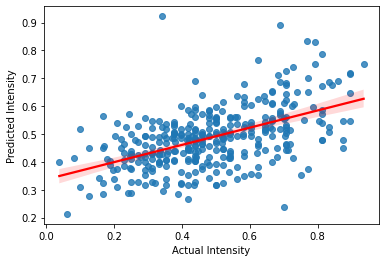

In [ ]:
#Plotting distribution of actual intensity to the predicted intensity
sns.regplot(y_actual, y_predicted, line_kws={'color':'red'})
plt.xlabel("Actual Intensity")
plt.ylabel("Predicted Intensity")

In [ ]:
#Training the final model with the combination of training and development data
combined_training = pd.concat([data_training[['id', 'text', 'label', 'intensity']], data_dev]).reset_index()
combined_training.shape

(3960, 5)

In [ ]:
#ANGER
anger = combined_training.loc[combined_training['label']=='anger']
anger_vectorizer = TfidfVectorizer(max_features=1000)
X_anger = anger_vectorizer.fit_transform(anger['text'])
anger_model = svm.SVR().fit(X_anger, anger['intensity'])

#FEAR
fear = combined_training.loc[combined_training['label']=='fear']
fear_vectorizer = TfidfVectorizer(max_features=1000)
X_fear = fear_vectorizer.fit_transform(fear['text'])
fear_model = svm.SVR().fit(X_fear, fear['intensity'])

#SADNESS
sad = combined_training.loc[combined_training['label']=='sadness']
sad_vectorizer = TfidfVectorizer(max_features=1000)
X_sad = sad_vectorizer.fit_transform(sad['text'])
sad_model = svm.SVR().fit(X_sad, sad['intensity'])

#JOY
joy = combined_training.loc[combined_training['label']=='joy']
joy_vectorizer = TfidfVectorizer(max_features=1000)
X_joy = joy_vectorizer.fit_transform(joy['text'])
joy_model = svm.SVR().fit(X_joy, joy['intensity'])

In [ ]:
#Load testing data
cols = ["id", "text", "label", "intensity"]

#path = "../input/wassa2017-emotion-intensity/"
anger_test = pd.read_csv('/content/drive/MyDrive/iqgateway/test/with/anger-ratings-0to1.test.gold.txt', header=None, sep="\t", names=cols, index_col=0)
fear_test = pd.read_csv('/content/drive/MyDrive/iqgateway/test/with/fear-ratings-0to1.test.gold.txt', header=None, sep="\t", names=cols, index_col=0)
sad_test = pd.read_csv('/content/drive/MyDrive/iqgateway/test/with/sadness-ratings-0to1.test.gold.txt', header=None, sep="\t", names=cols, index_col=0)
joy_test = pd.read_csv('/content/drive/MyDrive/iqgateway/test/with/joy-ratings-0to1.test.gold.txt', header=None, sep="\t", names=cols, index_col=0)

anger_test.head()

,text,label,intensity
id,,,
10941,At the point today where if someone says somet...,anger,0.319
10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
10943,This game has pissed me off more than any othe...,anger,0.898
10944,@spamvicious I've just found out it's Candice ...,anger,0.271
10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646


In [ ]:
#cleaning the test data
anger_text = tweet_cleaner(anger_test)
fear_text = tweet_cleaner(fear_test)
sad_text = tweet_cleaner(sad_test)
joy_text = tweet_cleaner(joy_test)

Cleaning and parsing the tweets.....

Done!
Cleaning and parsing the tweets.....

Done!
Cleaning and parsing the tweets.....

Done!
Cleaning and parsing the tweets.....

Done!


In [ ]:
#making prediction using the final model

#ANGER
X_anger_test = anger_vectorizer.transform(anger_text)
Y_anger_actual = anger_test['intensity']
Y_anger_predicted = anger_model.predict(X_anger_test)

#FEAR
X_fear_test = fear_vectorizer.transform(fear_text)
Y_fear_actual = fear_test['intensity']
Y_fear_predicted = fear_model.predict(X_fear_test)

#SADNESS
X_sad_test = sad_vectorizer.transform(sad_text)
Y_sad_actual = sad_test['intensity']
Y_sad_predicted = sad_model.predict(X_sad_test)

#JOY
X_joy_test = joy_vectorizer.transform(joy_text)
Y_joy_actual = joy_test['intensity']
Y_joy_predicted = joy_model.predict(X_joy_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 1.0, 'JOY')

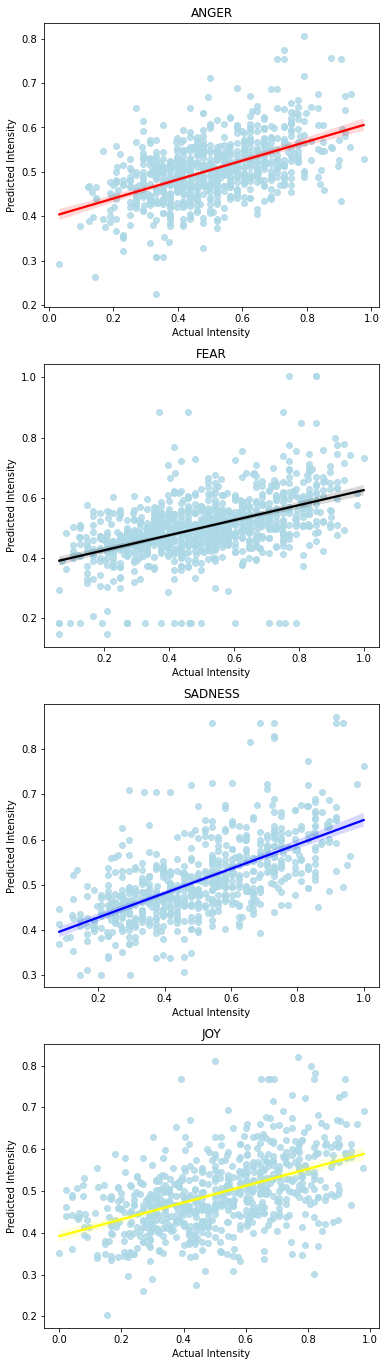

In [ ]:
#Visualising the result of the predictions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(6, 24))

#ANGER
sns.regplot(Y_anger_actual, Y_anger_predicted, ax=ax1, line_kws={'color':'red'}, scatter_kws={"color": "lightblue"})
ax1.set_xlabel("Actual Intensity")
ax1.set_ylabel("Predicted Intensity")
ax1.set_title("ANGER")

#FEAR
sns.regplot(Y_fear_actual, Y_fear_predicted, ax=ax2, line_kws={'color':'black'}, scatter_kws={"color": "lightblue"})
ax2.set_xlabel("Actual Intensity")
ax2.set_ylabel("Predicted Intensity")
ax2.set_title("FEAR")

#SADNESS
sns.regplot(Y_sad_actual, Y_sad_predicted, ax=ax3, line_kws={'color':'blue'}, scatter_kws={"color": "lightblue"})
ax3.set_xlabel("Actual Intensity")
ax3.set_ylabel("Predicted Intensity")
ax3.set_title("SADNESS")

#JOY
sns.regplot(Y_joy_actual, Y_joy_predicted, ax=ax4, line_kws={'color':'yellow'}, scatter_kws={"color": "lightblue"})
ax4.set_xlabel("Actual Intensity")
ax4.set_ylabel("Predicted Intensity")
ax4.set_title("JOY")

In [ ]:
get_score(Y_anger_actual, Y_anger_predicted, "Result of Anger Model")
get_score(Y_fear_actual, Y_fear_predicted, "Result of Fear Model")
get_score(Y_sad_actual, Y_sad_predicted, "Result of Sadness Model")
get_score(Y_joy_actual, Y_joy_predicted, "Result of Joy Model")

Result of Anger Model

Mean Absolute Error: 0.11944444363659822
Mean Squared Error: 0.02180189759008207
Root Mean Squared Error: 0.14765465651337267
-------------------------------------------------------------------------------
Result of Fear Model

Mean Absolute Error: 0.14227582276943665
Mean Squared Error: 0.03041384934025264
Root Mean Squared Error: 0.17439566892630287
-------------------------------------------------------------------------------
Result of Sadness Model

Mean Absolute Error: 0.13576028784385227
Mean Squared Error: 0.0269213896904135
Root Mean Squared Error: 0.16407738933324573
-------------------------------------------------------------------------------
Result of Joy Model

Mean Absolute Error: 0.15583036021157692
Mean Squared Error: 0.03639827722575841
Root Mean Squared Error: 0.19078332533468015
-------------------------------------------------------------------------------


In [ ]:
#Using the official evalution function
def evaluate(pred,gold):

    # lists storing gold and prediction scores
    gold_scores=[]  
    pred_scores=[]

    # lists storing gold and prediction scores where gold score >= 0.5
    gold_scores_range_05_1=[]
    pred_scores_range_05_1=[]
        
    for p in pred:
        pred_scores.append(p)
        
    for g in gold:
        gold_scores.append(g)

    for i in range(len(gold_scores)):
        if gold_scores[i] >= 0.5:
            gold_scores_range_05_1.append(gold_scores[i])
            pred_scores_range_05_1.append(pred_scores[i])

    
    # return zero correlation if predictions are constant
    if np.std(pred_scores)==0 or np.std(gold_scores)==0:
        return (0,0,0,0)
    

    pears_corr=scipy.stats.pearsonr(pred_scores,gold_scores)[0]                                     
    pears_corr_range_05_1=scipy.stats.pearsonr(pred_scores_range_05_1,gold_scores_range_05_1)[0]                                           
    
    
    return (pears_corr,pears_corr_range_05_1)

In [ ]:
pear_results=[]
spear_results=[]

pear_results_range_05_1=[]
spear_results_range_05_1=[]

num_pairs = 4
argv = ["Anger_Actual", Y_anger_actual, "Anger_Predicted", Y_anger_predicted, "Fear_Actual", Y_fear_actual, "Fear_Predicted", Y_fear_predicted, "Sad_Actual", Y_sad_actual, "Sad_Predicted", Y_sad_predicted, "Joy_Actual", Y_joy_actual, "Joy_Predicted", Y_joy_predicted]

for i in range(0,num_pairs*4,4):
    name_gold = argv[i]
    gold=argv[i+1]
    name_pred = argv[i+2]
    pred=argv[i+3]       
    result=evaluate(pred,gold)
    
    print ("Pearson correlation between ", name_pred, " and ", name_gold, ":\t", str(result[0]))        
    pear_results.append(result[0])


    print ("Pearson correlation for gold scores in range 0.5-1 between ",name_pred," and ",name_gold,":\t",str(result[1]))       
    pear_results_range_05_1.append(result[1])


avg_pear=np.mean(pear_results)

avg_pear_range_05_1=np.mean(pear_results_range_05_1)

print ("Average Pearson correlation:\t",str(avg_pear))

print ("Average Pearson correlation for gold scores in range 0.5-1:\t", str(avg_pear_range_05_1))

Pearson correlation between  Anger_Predicted  and  Anger_Actual :	 0.524538700955672
Pearson correlation for gold scores in range 0.5-1 between  Anger_Predicted  and  Anger_Actual :	 0.3981443709944903
Pearson correlation between  Fear_Predicted  and  Fear_Actual :	 0.49612801256752426
Pearson correlation for gold scores in range 0.5-1 between  Fear_Predicted  and  Fear_Actual :	 0.398268329609872
Pearson correlation between  Sad_Predicted  and  Sad_Actual :	 0.6108693791668378
Pearson correlation for gold scores in range 0.5-1 between  Sad_Predicted  and  Sad_Actual :	 0.44059772433058847
Pearson correlation between  Joy_Predicted  and  Joy_Actual :	 0.4886378336014278
Pearson correlation for gold scores in range 0.5-1 between  Joy_Predicted  and  Joy_Actual :	 0.2980840064712488
Average Pearson correlation:	 0.5300434815728655
Average Pearson correlation for gold scores in range 0.5-1:	 0.3837736078515499
